<a href="https://colab.research.google.com/github/AamirKhaan/Student-Academic-Performance/blob/master/07_Preliminary_DecisionTreeClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 style="background-color:Aqua; padding:20px; border-radius:10px">Preliminary Decision Tree Classifier</h1>

## Overview      

<div style="background-color:Gainsboro; padding:20px; text-align:justify; font-weight: bold">
    <p>In this section we will </p>
    <ol>
        <li>Import Modified Data</li>
        <li>Encode Data</li>
        <li>Preliminary Decision Tree Classification Model</li>
        <li>Preliminary Model Features</li>
    </ol>
</div>


### Standard Imports

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
# Jupyter Noteboook Configurations (personal prefrences)
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

pd.set_option('display.max_columns', None)
#pd. set_option('display.max_rows', None)
sns.set() 

In [3]:
# Global parameters for figure
plt.rcParams["figure.figsize"] = [10.00, 8.00]
plt.rcParams["figure.dpi"] = 100
plt.rcParams["figure.autolayout"] = True

### 1. Import Modified Data

In [4]:
# Import the Student's data from local storage
# ! Dont' run the cell in colab
data_df = pd.read_csv('./data/xAPI-Edu-Data_modified.csv')

In [5]:
# Import the Student's data from github storage
# Run only in colab
url = 'https://raw.githubusercontent.com/AamirKhaan/Student-Academic-Performance/main/data/xAPI-Edu-Data_modified.csv'
data_df = pd.read_csv(url)

In [6]:
CATEGORICAL_FEATURES = ['gender', 'nationality','place_of_birth', 'stage_id', 'grade_id', 'section_id', 'topic', 
                        'semester', 'relation', 'parent_answering_survey', 'parent_school_satisfaction', 
                        'student_absence_days']

NUMERICAL_FEATURES = ['raised_hands', 'visited_resources', 'announcements_view', 'discussion']

TARGET = ['class']

In [7]:
# Optimize Data Type for efficent memory utilization
for feature in CATEGORICAL_FEATURES:
    data_df[feature] = data_df[feature].astype('category')
    
for feature in NUMERICAL_FEATURES:
    data_df[feature] = data_df[feature].astype('int8')

data_df[TARGET] = data_df[TARGET].astype('category')

### 2. Encode Data

####  2.1 Categorical Data

In [8]:
categorical_encoder = OrdinalEncoder(dtype='int8')
categorical_ds  = categorical_encoder.fit_transform(data_df[CATEGORICAL_FEATURES])
categorical_encoded = pd.DataFrame(categorical_ds, columns=CATEGORICAL_FEATURES, dtype='int8')

#### 2.2 Target Output

In [9]:
target_encoder = LabelEncoder()
target_ds = target_encoder.fit_transform(data_df[TARGET])
target_encoded = pd.DataFrame(target_ds, columns=TARGET, dtype='int8')

#### 2.3 Combine Encoded Data

In [10]:
encoded_df = pd.concat([categorical_encoded,data_df[NUMERICAL_FEATURES]], axis=1)
encoded_df.head()

,gender,nationality,place_of_birth,stage_id,grade_id,section_id,topic,semester,relation,parent_answering_survey,parent_school_satisfaction,student_absence_days,raised_hands,visited_resources,announcements_view,discussion
0,1,1,1,1,1,0,1,0,0,1,1,1,15,16,2,20
1,1,1,1,1,1,0,1,0,0,1,1,1,20,20,3,25
2,1,1,1,1,1,0,1,0,0,0,0,0,10,7,0,30
3,1,1,1,1,1,0,1,0,0,0,0,0,30,25,5,35
4,1,1,1,1,1,0,1,0,0,0,0,0,40,50,12,50


### 3. Priliminary Decision Tree Classification Model

In [11]:
X = encoded_df
y = target_encoded

In [12]:
# Test train split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [13]:
# Preliminary Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=42)

#### 3.1 Model Parameters

In [14]:
# Model parameters
clf.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}

In [15]:
# Train the model
clf = clf.fit(X_train, y_train)

#### 3.2 Model Accuracy

In [16]:
y_hat = clf.predict(X_test)
preliminary_test_accuracy = accuracy_score(y_test, y_hat)
print(f'Preliminary DT Test Accuracy: {preliminary_test_accuracy*100}')

Preliminary DT Test Accuracy: 70.25316455696202


In [17]:
predictions_train = clf.predict(X_train)
preliminary_train_accuracy = accuracy_score(y_train, predictions_train)
print(f'Preliminary Train Accuracy: {preliminary_train_accuracy*100}')

Preliminary Train Accuracy: 100.0


### 4. Priliminary Model Features

#### 4.1 The Decision Tree

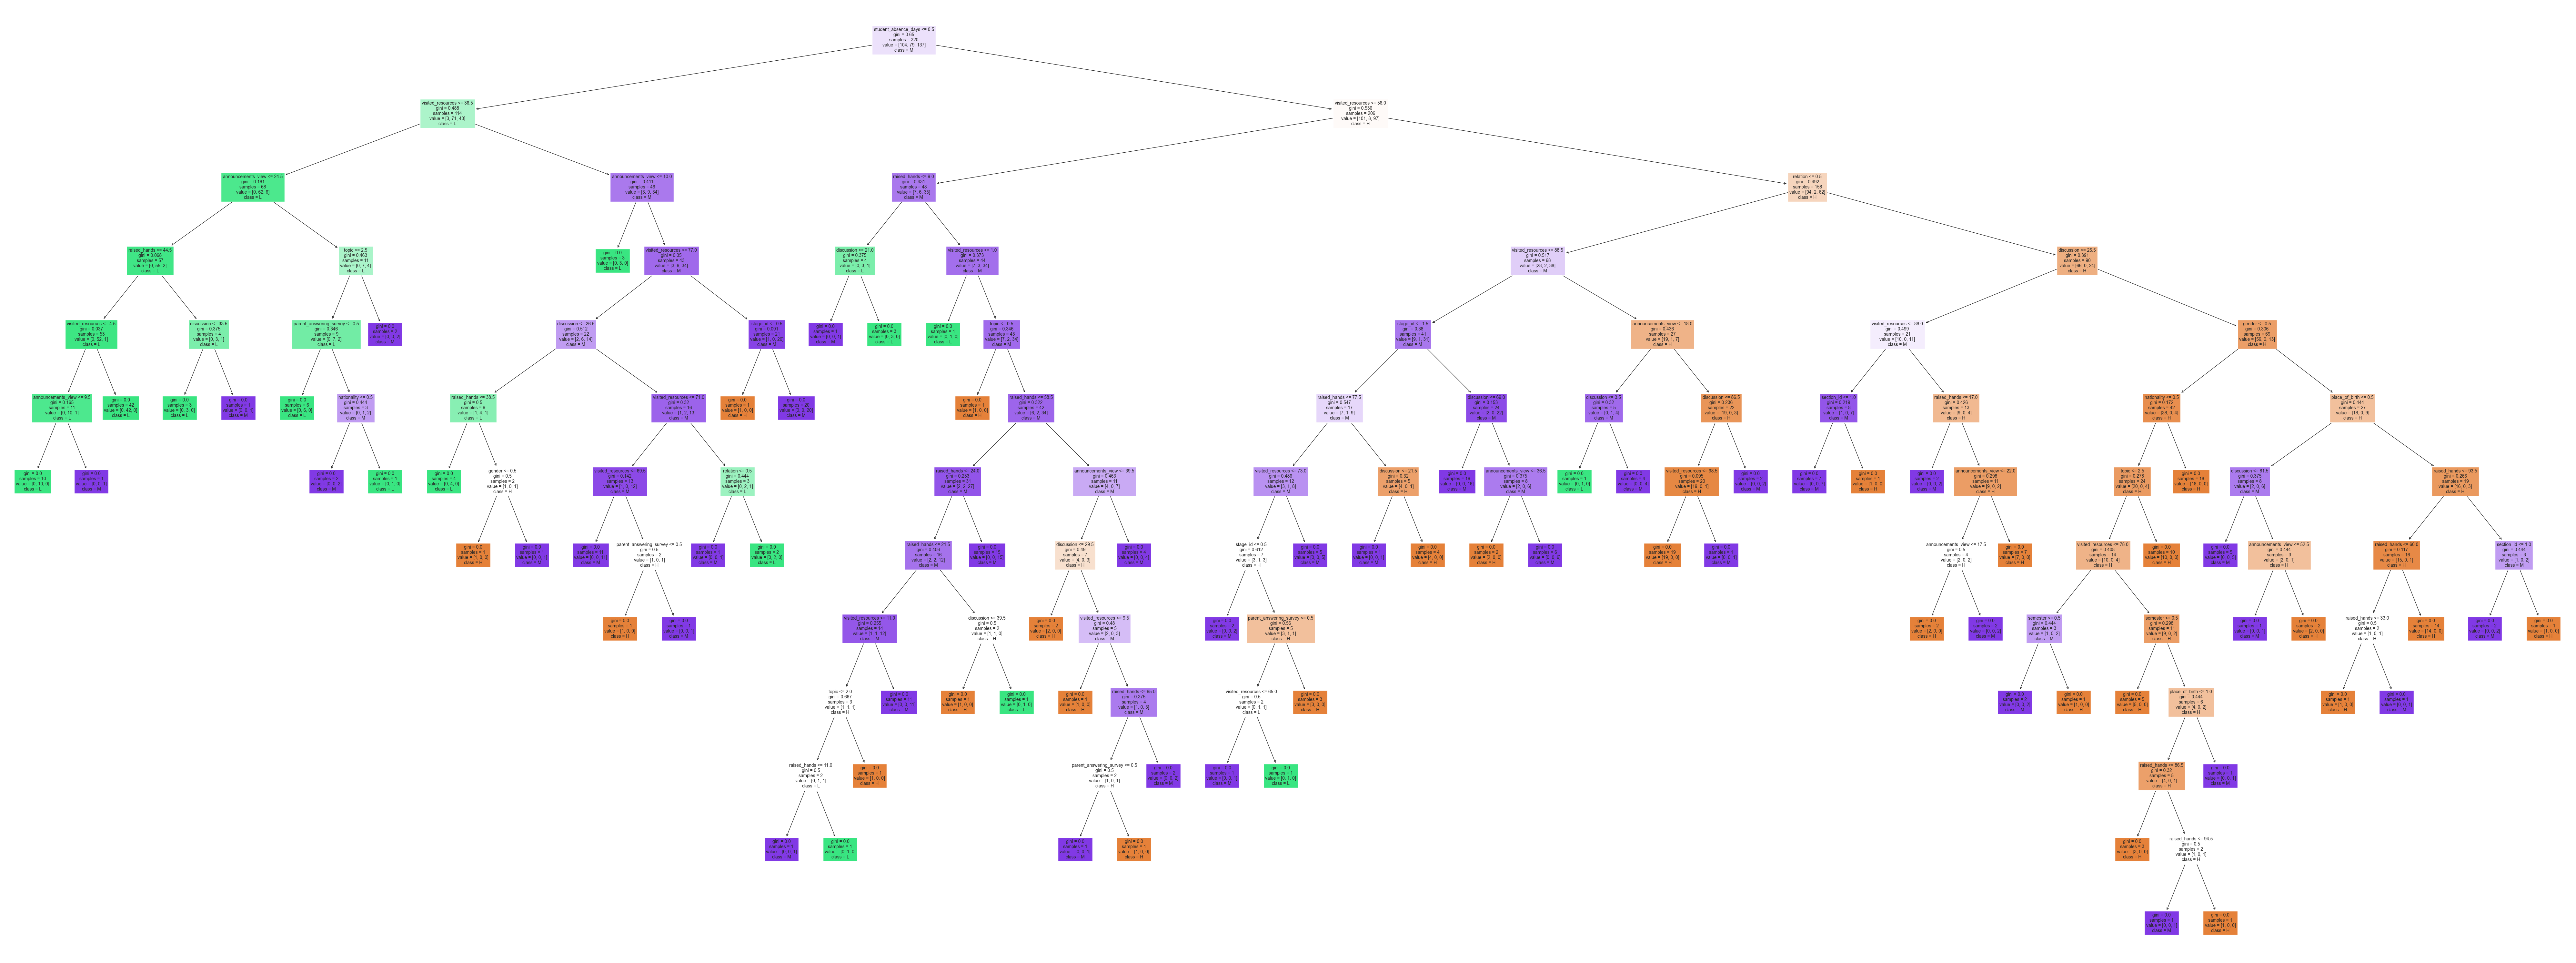

In [24]:
fig = plt.figure(figsize=(80,30))

_=plot_tree(clf, feature_names = X.columns,
                 class_names ={0:'H', 1:'L', 2:'M'},
                 filled = True,
                  fontsize=10)

#### 4.2 Feature Importance

In [26]:
feature_importance = pd.DataFrame(clf.feature_importances_, index = X.columns, columns = ['importance']).sort_values('importance', ascending= False)
feature_importance

,importance
visited_resources,0.304185
student_absence_days,0.201313
announcements_view,0.105345
discussion,0.099084
raised_hands,0.096152
relation,0.041714
stage_id,0.028795
parent_answering_survey,0.026811
topic,0.025437
place_of_birth,0.024101


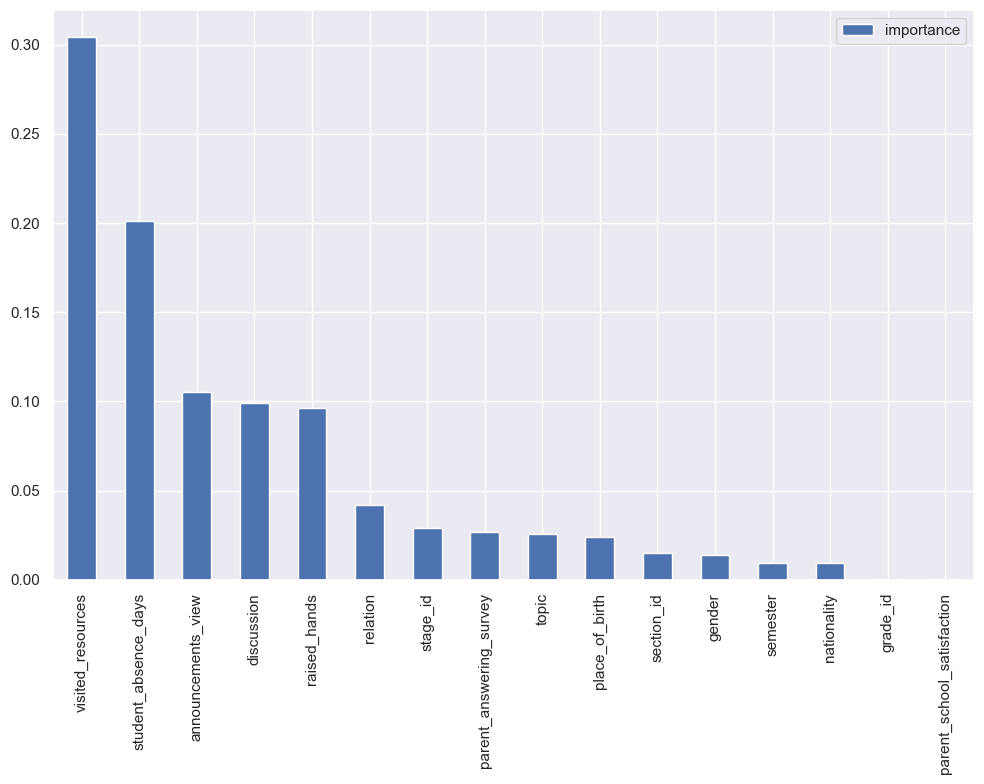

In [27]:
# Feature Importance Plot
feature_importance.plot(kind='bar');

#### 4.3 Tree Depth

In [28]:
# Get the maximum depth of the tree
print(f'Preliminary Model Decision Tree Depth : {clf.get_depth()}')

Preliminary Model Decision Tree Depth : 12


#### 4.4 Number of leaves

In [29]:
# Number of leaves 
print(f'Preliminary Model Decision Tree, Number of Leaves : {clf.get_n_leaves()}')

Preliminary Model Decision Tree, Number of Leaves : 75


## Observations
  
The key steps in the configuration and training of Preliminary Decision Tree Model are: 
   
1. All the input categorial data is ordinal encoded.
2. The target class is label encoded.
3. We use standard train test split with 33% test size and 67% trainign size.
4. All the input features are included in the traing of the model.
5. The pleminary decision tree model is instantiated with default parameters.
6. The random state is set at 42.
7. The trained model has test accuracy of 70.25.% and training accuracy of 100%.
8. The analysis of model accuracies on training and test data show over fitting, whic is normal in case of Decision Trees.
9. The Tree Depth is 12 levels.
10. The total Number of tree leaves are 75.
11. The feature importance score is similiar to the statistical filters applied for feature selction.



## Conclusion
Based on the obervations:

1. To develop a base model the Decision Tree should be trained only with the high scoring features.
2. To remove the over fitting the Tree should be pruned by altering the hyperparametres of the model.
3. The base model must be optimized using the preformance analysis based on the comprasion on train and test accuracies.
4. The two parameters that can be tweaked to get a optimized model are Maximum Depth and Minimal Cost-Complexity Pruning.